# Reducción de la dimensionalidad

Vamos a ver cómo funciona el algoritmo de PCA utilizado un dataset muy conocido en el mundo del aprendizaje automático: el dataset de los dígitos. 

El dataset de los dígitos está compuesto por 1797 imágenes de dígitos manuscritos de tamaño 8x8. Este dataset se utiliza normalmente para algoritmos de clasificación (que veremos más adelante), pero también es un buen ejemplo para ver los algoritmos de clustering y de reducción de dimensionalidad. 

Cada dígito viene representado por un vector de 64 componentes que corresponden a los valores de cada pixel del dígito. Para más información sobre este dataset ver: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html.

En esta parte de la práctica compararemos los resultados que se obtienen utilizando K-means y K-means combinado con PCA. Para ello empezamos cargando las librerías necesarias. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np

Fijamos la semilla para obtener siempre los mismos resultados.

In [2]:
np.random.seed(42)

Cargamos el dataset de los dígitos.

In [3]:
digits = load_digits()

Obtenemos los descriptores de las instancias y estandarizamos (veremos en qué consiste este proceso más adelante) el dataset.

In [4]:
data = scale(digits.data)

Mostramos el número de instancias del dataset y el número de descriptores.

In [5]:
n_instancias, n_descriptores = data.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 1797, n_descriptores 64


Construimos el estimador K-means. Tenemos 10 clusters ya que de antemano sabemos que hay 10 posibles dígitos y por lo tanto 10 posibles grupos.

In [6]:
estimator = KMeans(n_clusters=10)

Realizamos la agrupación por clusters y mostramos el tiempo necesario

In [9]:
%%time 
estimator.fit(data)

CPU times: user 657 ms, sys: 1.19 s, total: 1.84 s
Wall time: 249 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Ahora definimos una función que nos indica para cada clase la distribución en clusters. Notad que los clusters no están ordenados.

In [10]:
def valida_digits(etiquetas_esperadas, etiquetas_obtenidas):
    for i in range(0,10):
        res = np.zeros(10).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print("Dígito " + str(i) + ": ")
        print(res)

Mostramos la distribución de los dígitos.

In [11]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0   0   0   0 177   1   0   0   0]
Dígito 1: 
[27  0  0  0  0  0  0 96  1 58]
Dígito 2: 
[141   6   0   0   0   1   0  24   1   4]
Dígito 3: 
[  1 160   8   0   0   0   0   7   7   0]
Dígito 4: 
[  0   0   1   0   9   0 157   2   5   7]
Dígito 5: 
[  0  51 121   3   0   0   2   3   1   1]
Dígito 6: 
[  0   0   0 174   0   1   0   5   0   1]
Dígito 7: 
[  0   0   2   0  18   0   0   1 155   3]
Dígito 8: 
[  1  46   6   2   0   1   0 103   2  13]
Dígito 9: 
[  0 145   3   0   3   0   0   2   8  19]


Repetimos el proceso pero esta vez aplicando el algoritmo de PCA tomando 20 componentes principales

In [12]:
%%time 
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

CPU times: user 304 ms, sys: 576 ms, total: 880 ms
Wall time: 140 ms


In [13]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0   0   2   0 176   0   0   0   0]
Dígito 1: 
[  0   0   1  51   0   0   0   0 103  27]
Dígito 2: 
[ 1  4 78  4  3  0  0  0 34 53]
Dígito 3: 
[  0 159   6   0   8   0   0   0   8   2]
Dígito 4: 
[  2   0   1 158   9   0   0   9   2   0]
Dígito 5: 
[ 0 77 70  6  5  0  3  0 21  0]
Dígito 6: 
[  0   0   0   0   0   1 175   0   5   0]
Dígito 7: 
[  0   0   8   1 152   0   0  17   1   0]
Dígito 8: 
[  0  46  13   3   6   0   2   0 104   0]
Dígito 9: 
[  0 143   1  13  12   0   0   5   3   3]


***
## Ejercicio 
Compara los resultados tanto en tiempo, como en distribución de los clusters utilizando PCA y sin utilizarlo.

In [14]:
El algoritmo mezclado con PCA es el doble de rapido, ya que le cuesta practicamente la mitad del tiempo encontrar
la solucion. 657ms vs 304ms. Los clusters estan mejor distribuidos al usar PCA.

SyntaxError: invalid syntax (<ipython-input-14-50e71a603faf>, line 1)

***

Utilizando los siguientes comandos podemos ver el porcentaje de varianza explicado por cada una de las componentes de PCA y el total.

In [15]:
print(pca.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pca.explained_variance_ratio_))+ "%")

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.04214119
 0.03942083 0.0338938  0.02998219 0.02931995 0.02781802 0.02577048
 0.02275248 0.02227139 0.02165177 0.01913843 0.01774826 0.01635135
 0.01595408 0.014883  ]
Varianza total: 79.30766781692223%


La siguiente función nos genera un gráfico mostrando la varianza acumulada y la varianza individual que se obtiene al considerar distintos valores como componentes principales (en concreto va tomando valores entre 1 y el número de descriptores). Además esta función muestra la varianza total para cada caso.

In [16]:
from matplotlib import pyplot as plt

def drawVarianza(data):
    pcas = [PCA(n_components=k).fit(data) for k in range(1,len(data[0]))]
    var = [pca.explained_variance_ratio_[-1] for pca in pcas]
    varianzas = [np.sum(pca.explained_variance_ratio_) for pca in pcas]
    for k in range(1,len(data[0])):
        print("Varianza total (%s componentes): %s" % (k,str(100 * varianzas[k-1])))
    plt.clf()

    plt.step(range(1,len(data[0])),varianzas,where='mid',label='varianza acumulada')
    plt.bar(range(1,len(data[0])),var,alpha=0.5,align='center',label='varianza individual')
    plt.xlabel('Componentes principales')
    plt.ylabel('Ratio de varianza explicada')
    plt.show()

Varianza total (1 componentes): 12.033916097424777
Varianza total (2 componentes): 21.594970497734327
Varianza total (3 componentes): 30.039385367114775
Varianza total (4 componentes): 36.53779315849792
Varianza total (5 componentes): 41.397946377911154
Varianza total (6 componentes): 45.612065473059666
Varianza total (7 componentes): 49.55206529544125
Varianza total (8 componentes): 52.939839411572166
Varianza total (9 componentes): 55.93852158696265
Varianza total (10 componentes): 58.87131021562565
Varianza total (11 componentes): 61.6472232961282
Varianza total (12 componentes): 64.22814539706037
Varianza total (13 componentes): 66.49711576873051
Varianza total (14 componentes): 68.73119015902213
Varianza total (15 componentes): 70.8989952671167
Varianza total (16 componentes): 72.80882874347353
Varianza total (17 componentes): 74.57216390825577
Varianza total (18 componentes): 76.2229749770539
Varianza total (19 componentes): 77.8216232926628
Varianza total (20 componentes): 79.31

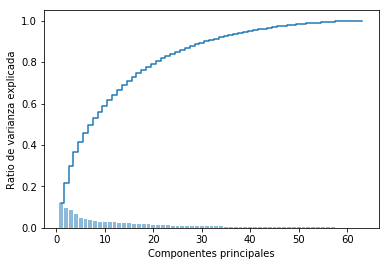

In [32]:
drawVarianza(data)

*** 
## Ejercicio
En clase hemos visto que para elegir el número de componentes k, debemos tomar el menor k tal que la varianza total sea mayor que el 99%. En nuestro caso, ¿qué valor deberíamos tomar?

In [ ]:
54 es el valor segun la grafica de arriba

***

## Ejercicio adicional
Recupera los ficheros de la práctica 5 y repite el análisis hecho para el dataset de los dígitos, pero esta vez utilizando el dataset iris.csv.
